<a href="https://colab.research.google.com/github/purosh96/ML/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
upload = files.upload()

Saving breast-cancer-wisconsin.csv to breast-cancer-wisconsin.csv


In [4]:
import pandas as pd
df = pd.read_csv("breast-cancer-wisconsin.csv")

In [5]:
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chromation,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df["class"].value_counts(normalize=True)

2    0.655222
4    0.344778
Name: class, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromation        699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
df.bare_nuclei.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [9]:
import numpy as np
df.bare_nuclei.replace('?',np.nan,inplace=True)
df.dropna(inplace=True)
df.bare_nuclei = pd.to_numeric(df.bare_nuclei)


In [10]:
df.drop(columns=["id"],inplace=True)

In [11]:
X = df.drop(columns='class')
y = df[["class"]]

In [12]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=55,stratify=y)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [34]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [35]:
y_pred = knn.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
knn.score(X_test,y_test)

0.9707317073170731

In [37]:
accuracy_score(y_test,y_pred)

0.9707317073170731

In [38]:
ta = []
te = []
for i in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=i);
  #print("i")
  knn.fit(X_train,y_train)
  ta.append(knn.score(X_train,y_train))
  te.append(knn.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [41]:
import matplotlib.pyplot as plt

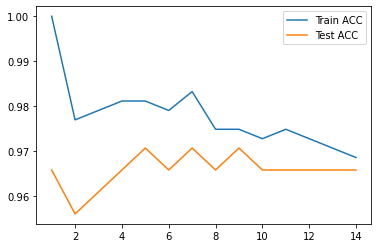

In [42]:
plt.plot(range(1,15),ta,label="Train ACC")
plt.plot(range(1,15),te,label="Test ACC")
plt.legend()
plt.show()

In [44]:
ta[6],te[6]

(0.9832635983263598, 0.9707317073170731)